In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from scipy import stats
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv('healthinsurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are three different types of data (int64, float64 and object) present in the dataset

### Exploring Data Variables

In [9]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Clearly we can see that there is no nan value present inside the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here all the variables are non null

In [12]:
df.isnull().sum().sum()

0

### To check the missing values

<AxesSubplot:>

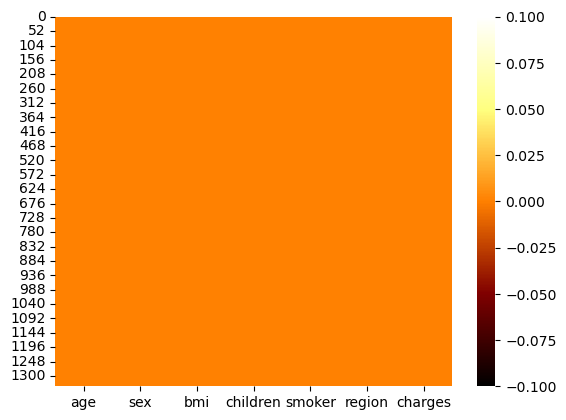

In [13]:
sns.heatmap(df.isnull(),cmap='afmhot')

In [14]:
df.age.nunique()

47

In [15]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [16]:
df.sex.nunique()

2

In [17]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
df.bmi.nunique()

548

In [19]:
df.children.nunique()

6

In [20]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [21]:
df.smoker.nunique()

2

In [22]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df.region.nunique()

4

In [24]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
df.charges.nunique()

1337

In [26]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [27]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

Here  column (sex,children,smoker and region) are categorical column and column(age,bim,and charges) are continuous column

In [28]:
df.shape

(1338, 7)

#### Separating Categorical columns and Numerical columns

In [29]:
#Checking for Categorical Columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns: ',categorical_col)
print('\n')

#Checking for Numerical Columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Column: ', numerical_col)

categorical columns:  ['sex', 'smoker', 'region']


Numerical Column:  ['age', 'bmi', 'children', 'charges']


In [30]:
df.nunique().to_frame('No of unique values')

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


The above table represent the number of unique value present in each column

### Description of Dataset

In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of numerical columns. The summery looks perfect since there is no null value present.

Observation:
    
From the above table we observer that in all the columns the mean value is greater than 50% of the data wich indicated the presence of skewness in the data.

The standard deviation is age bmi and charges column is very high which says that the data is widely spread.

And there is a very large difference between the 75% and maximum value of charges column indication the presence of outliers

### Data Visualization

#### Univariate Analysis

male      676
female    662
Name: sex, dtype: int64


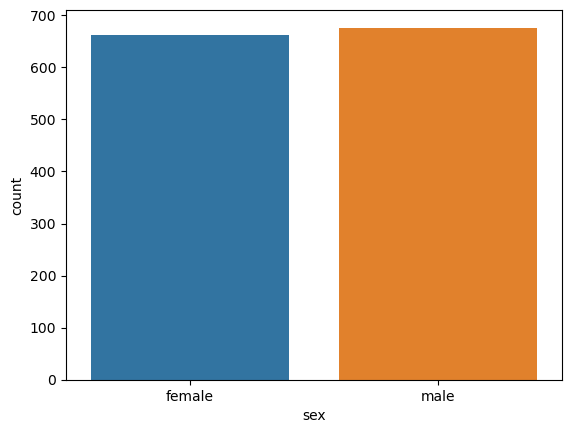

In [35]:
sns.countplot(df['sex'])
print(df['sex'].value_counts())

We can see that the ration between male and female using insurance is almost equal

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


<AxesSubplot:xlabel='children', ylabel='count'>

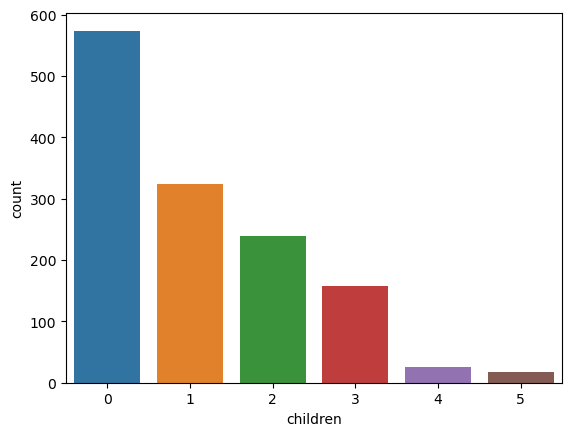

In [36]:
print(df['children'].value_counts())
sns.countplot(df['children'])

Here we can see that number of persons with using insurance with no children is high as compared to persons with children 

no     1064
yes     274
Name: smoker, dtype: int64


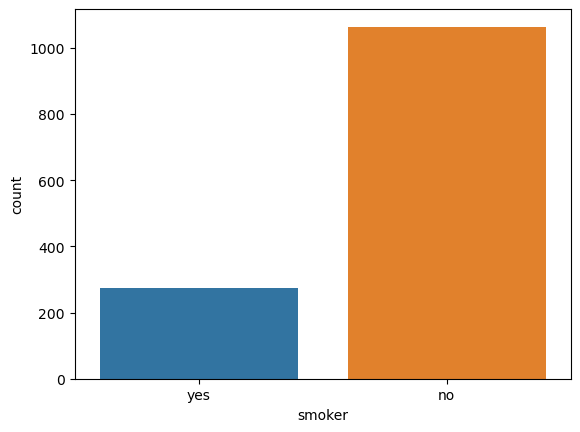

In [37]:
sns.countplot(df['smoker'])
print(df['smoker'].value_counts())

here we can see that the diffenence between the number of smokers and non smoker is very high.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


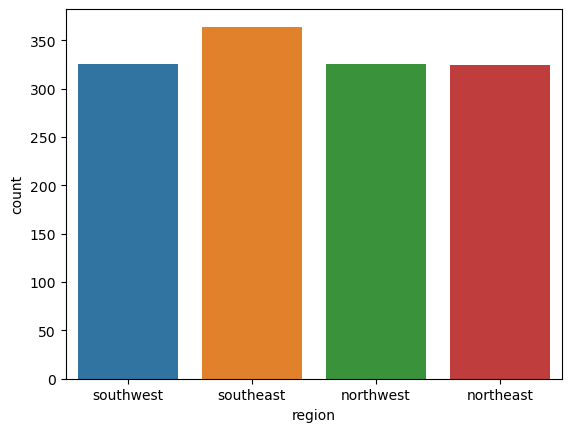

In [38]:
sns.countplot(df['region'])
print(df['region'].value_counts())

The insurance user from south west region is slightly higher than other region but all the 4 regions have almost equal amount of insurance user

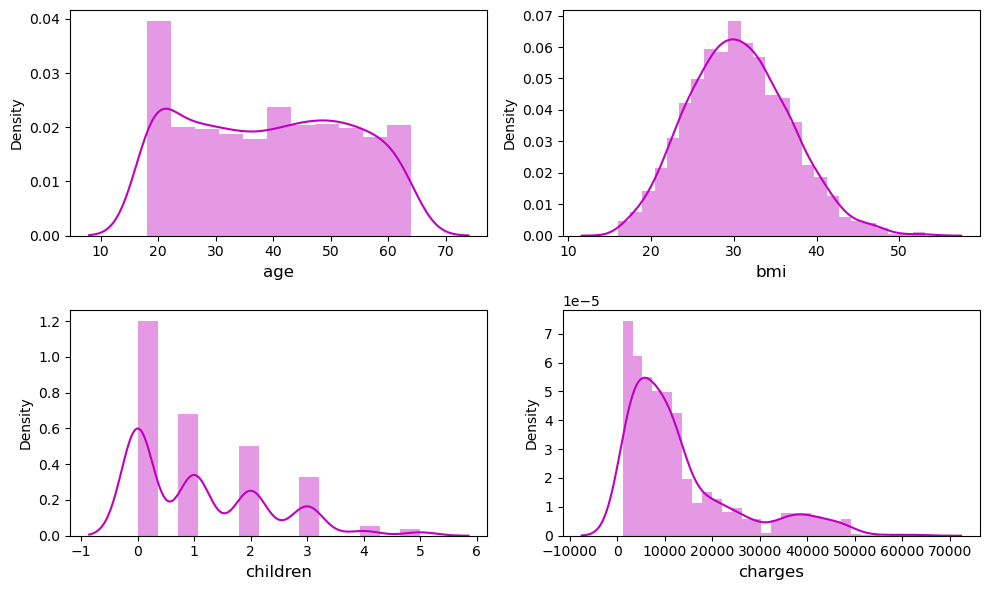

In [39]:
#Checking the distribution of data in using dist plot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Multivariate Analysis

age            AxesSubplot(0.125,0.11;0.168478x0.77)
bmi         AxesSubplot(0.327174,0.11;0.168478x0.77)
children    AxesSubplot(0.529348,0.11;0.168478x0.77)
charges     AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

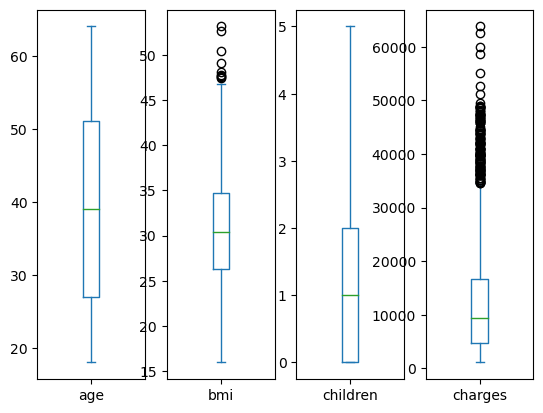

In [41]:
df.plot(kind='box',subplots=True)

#### Bivariate Analysis

In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

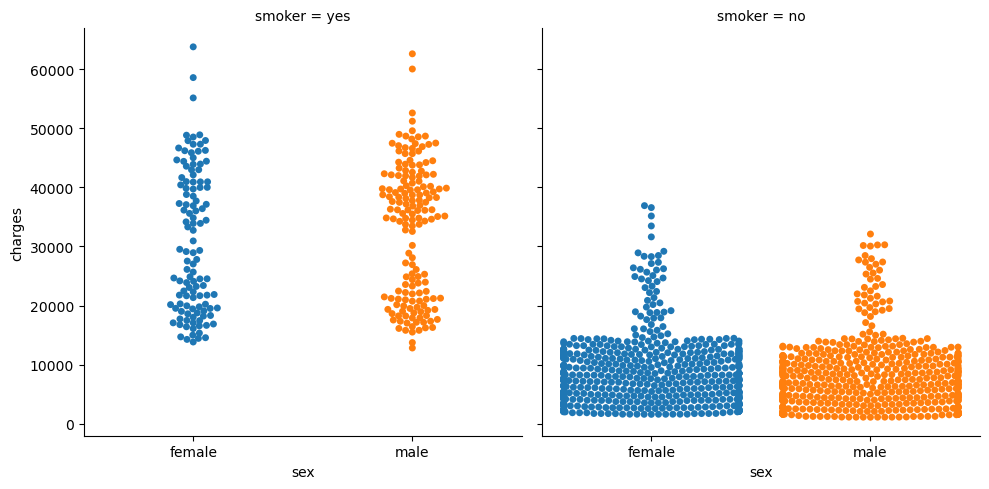

In [48]:
sns.catplot(y='charges',x='sex',col='smoker',data=df,kind='swarm')

In [49]:
df[(df['smoker']=='yes')&(df['sex']=='male')]['charges'].mean()

33042.00597528302

In [50]:
df[(df['smoker']=='yes')&(df['sex']=='female')]['charges'].mean()

30678.996276260867

From the diagram it is clear that smoking has high correlation with charges, if you smoke , 
then insurance paid will be high irrespective of gender. Further in the smoking categroy the mean of 
male smoker is higher than female smoker, 
need to compare with other variable like age and bmi to know why are they charged more than females

<AxesSubplot:xlabel='age', ylabel='charges'>

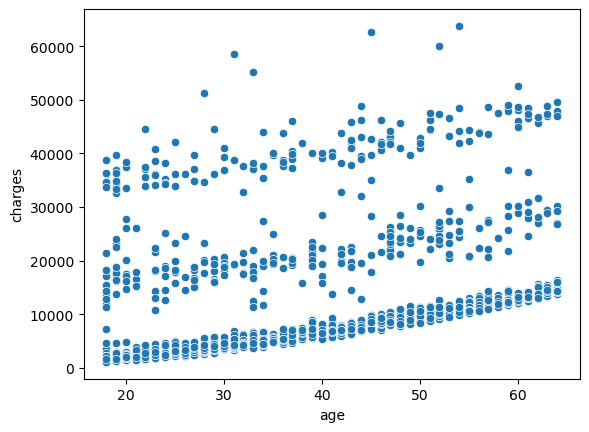

In [51]:
sns.scatterplot(x='age', y='charges',data=df)

In [52]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

From the data it is visible that the minimum age is 18 and the maximum age is 64. 
So if we convert this numerical data into categorical data we can get better insight of the data.

SO lets convert the age into: 18yrs-26 yrs as young , 
27yrs-40yrs as adult,41yrs to 55yrs as senior adult and 56yrs to 64yrs as Elder

In [53]:
df['age_cat']=np.NAN
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 26), 'age_cat'] = 'Young'
    col.loc[(col['age'] > 26) & (col['age'] <= 40), 'age_cat'] = 'Adult'
    col.loc[(col['age'] > 40) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

In [54]:
lst

[      age     sex     bmi  children smoker     region      charges  \
 0      19  female  27.900         0    yes  southwest  16884.92400   
 1      18    male  33.770         1     no  southeast   1725.55230   
 2      28    male  33.000         3     no  southeast   4449.46200   
 3      33    male  22.705         0     no  northwest  21984.47061   
 4      32    male  28.880         0     no  northwest   3866.85520   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1333   50    male  30.970         3     no  northwest  10600.54830   
 1334   18  female  31.920         0     no  northeast   2205.98080   
 1335   18  female  36.850         0     no  southeast   1629.83350   
 1336   21  female  25.800         0     no  southwest   2007.94500   
 1337   61  female  29.070         0    yes  northwest  29141.36030   
 
            age_cat  
 0            Young  
 1            Young  
 2            Adult  
 3            Adult  
 4            Adult  
 ...          

In [55]:
df['age_cat'].value_counts()

Senior Adult    421
Adult           367
Young           334
Elder           216
Name: age_cat, dtype: int64

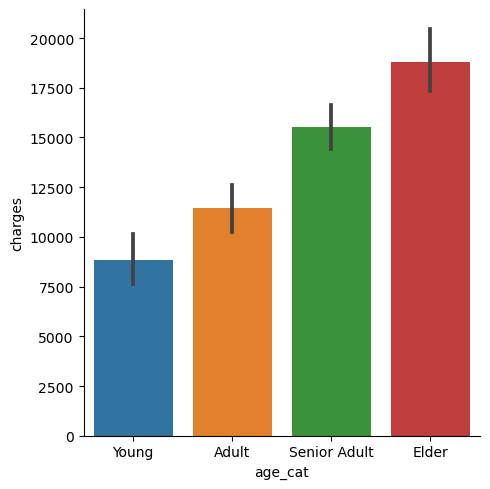

In [56]:
sns.catplot(x='age_cat', y='charges',data=df,kind='bar')

From the above we can now easily see the corelation(ordinal) between age and charges,
as the age increase insurance charge increase. 
But each group has some high values need to understand the reason, using other features.

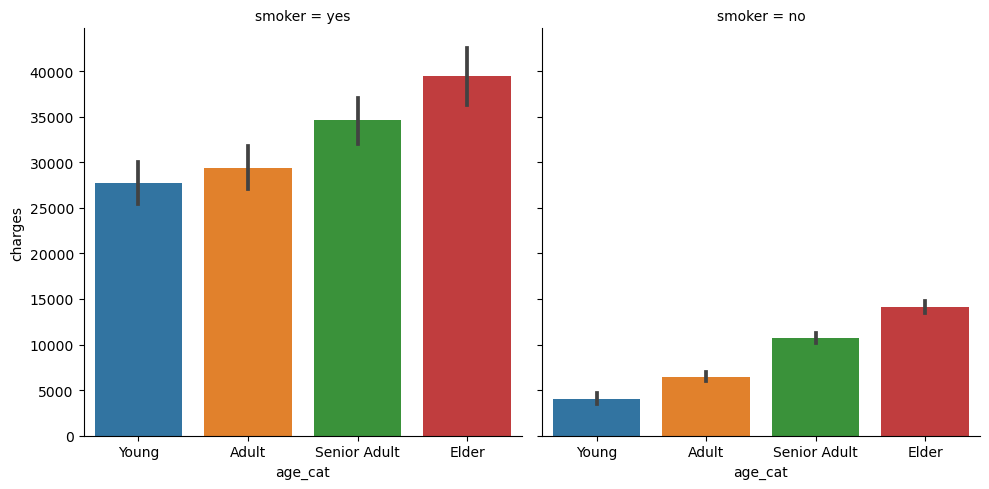

In [58]:
sns.catplot(x='age_cat', y='charges',data=df,kind='bar',col='smoker')

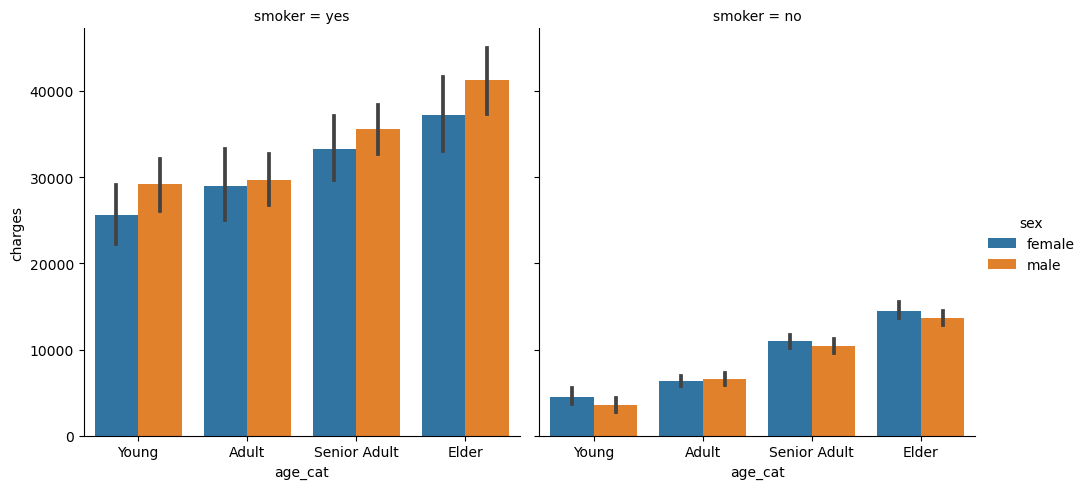

In [59]:
sns.catplot(x='age_cat', y='charges',data=df,kind='bar',col='smoker',hue='sex')

So from this we can confirm that non smoker of any age has low insurance charges in comparison to smokers.
In non smoker category, Males has slightly less insurance cost in comparison to female. 

<AxesSubplot:xlabel='bmi', ylabel='charges'>

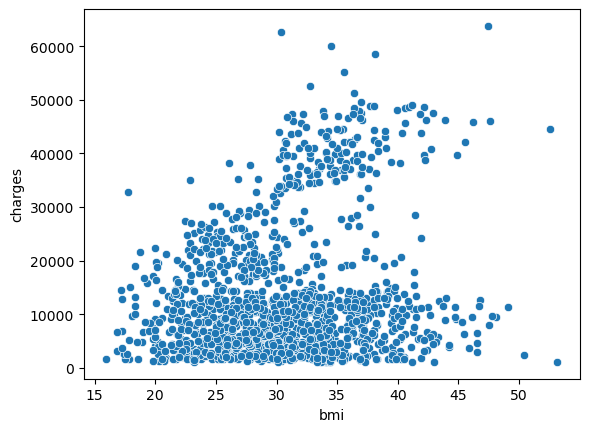

In [60]:
sns.scatterplot(x='bmi',y='charges',data=df)

If we see a BMI chart, there is 5 classes, 15 to 18 is underweight , 
19 to 24 is healthy ,25 to 29 is overweight ,30 to 39 is obese and greater than 40 is extremly obese.
So we will divide our data into that categories.

In [61]:
df.loc[(df['bmi']>= 15)&(df['bmi']<19), 'bmi_cat'] = 'underweight'
df.loc[(df['bmi']>= 19)&(df['bmi']<25), 'bmi_cat'] = 'healthy'
df.loc[(df['bmi']>= 25)&(df['bmi']<30), 'bmi_cat'] = 'overweight'
df.loc[(df['bmi']>= 30)&(df['bmi']<40), 'bmi_cat'] = 'obese'
df.loc[(df['bmi']>= 40), 'bmi_cat'] = 'ext_obese'

In [62]:
df['bmi_cat'].value_counts()

obese          616
overweight     386
healthy        221
ext_obese       91
underweight     24
Name: bmi_cat, dtype: int64

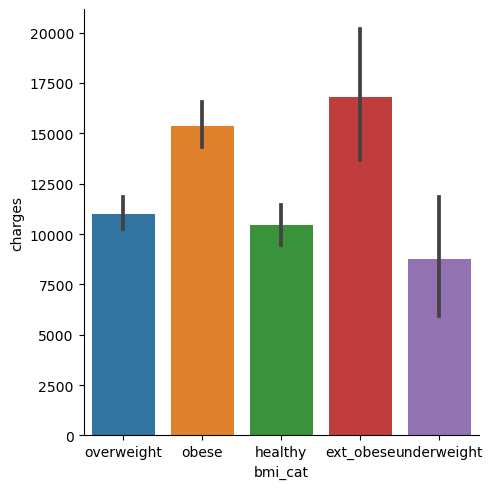

In [63]:
sns.catplot(x='bmi_cat',y='charges',kind='bar',data=df)

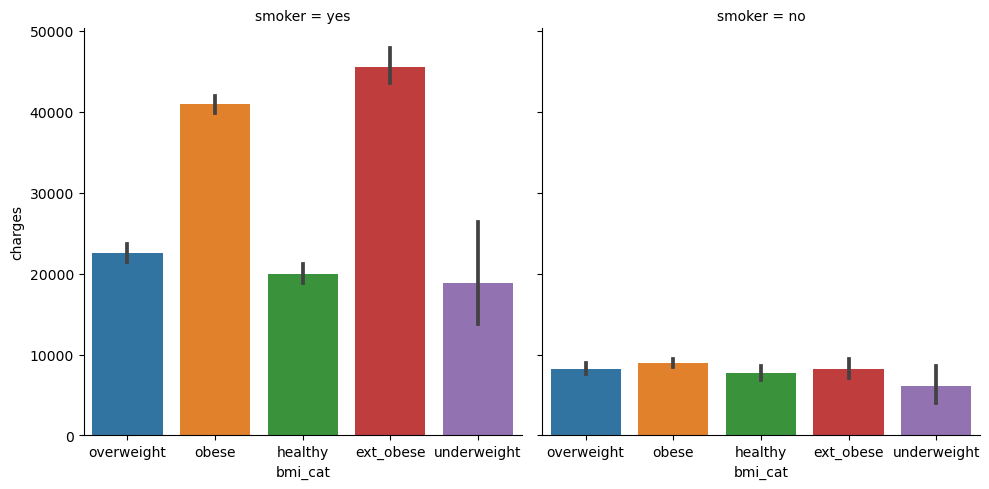

In [66]:
sns.catplot(x='bmi_cat',y='charges',col='smoker',kind='bar',data=df)

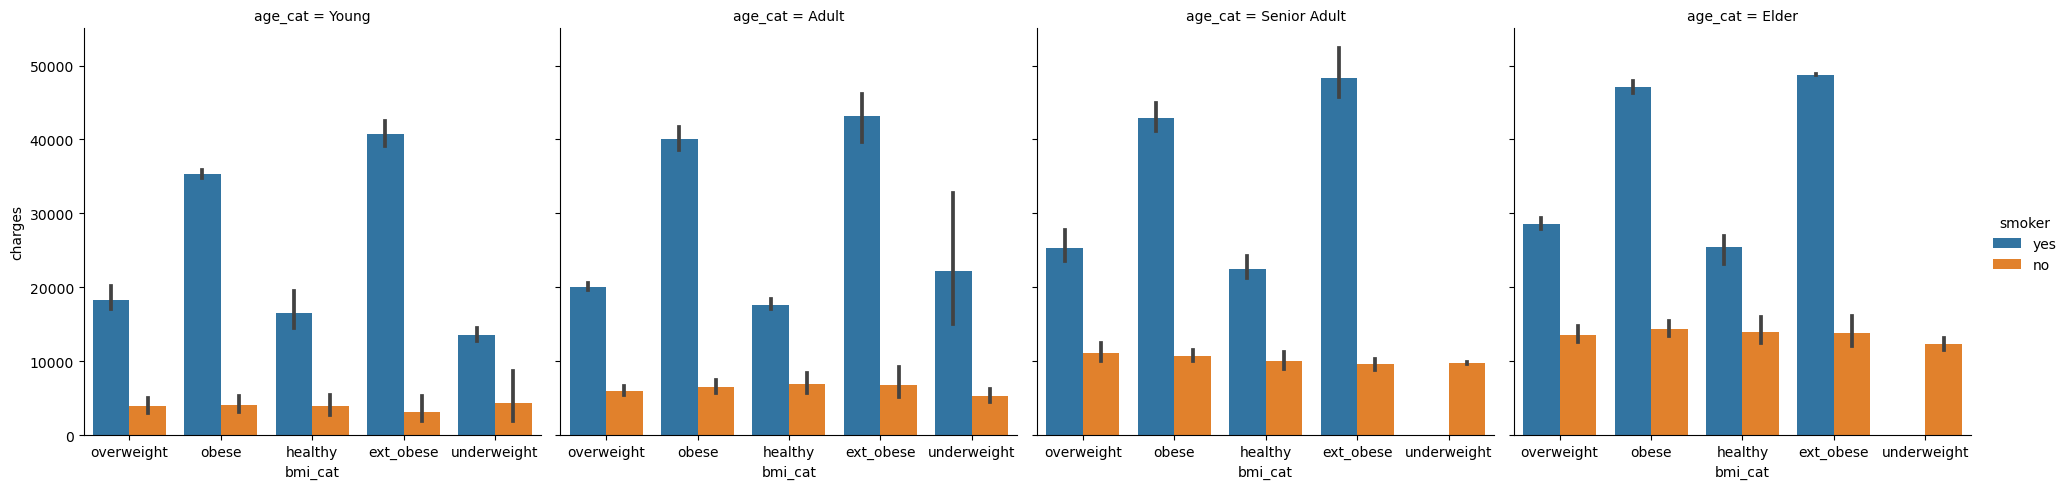

In [67]:
sns.catplot(x='bmi_cat',y='charges',col='age_cat',hue='smoker',kind='bar',data=df)

In all age category one thing is common, 
if you are obese or more and you smoke the expense will be very high. 
The same is applicabe for overweight and healthy but the ratio of increase is lesser than obese. 
Further with increasein age, expense increases as we have seen earlier.

<AxesSubplot:xlabel='children', ylabel='count'>

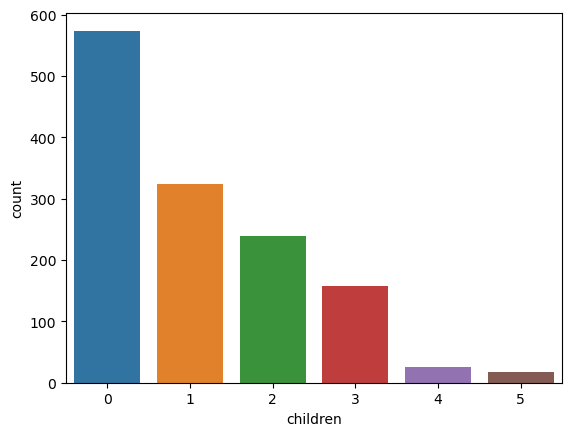

In [68]:
sns.countplot(df['children'])

<AxesSubplot:xlabel='children', ylabel='charges'>

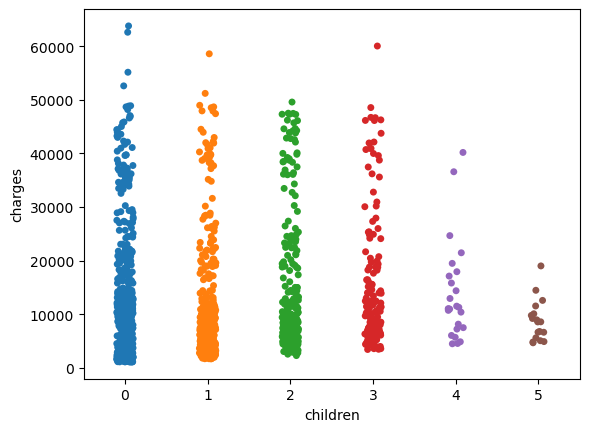

In [70]:
sns.stripplot(df['children'],df['charges'])

In [71]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [73]:
df['children']=df['children'].map({0:'0',1:'1',2:'2',3:'3+',4:'3+',5:'3+'})

In [74]:
df['children'].value_counts()

0     574
1     324
2     240
3+    200
Name: children, dtype: int64

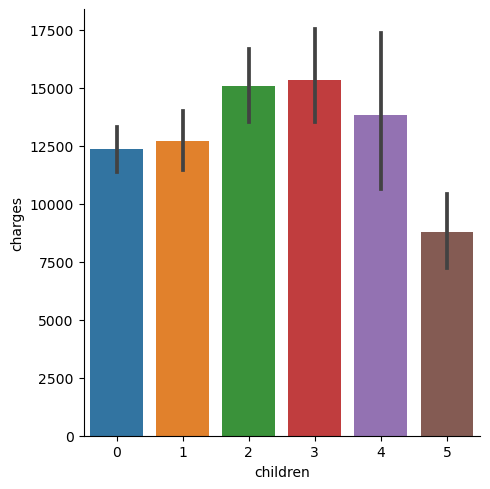

In [72]:
sns.catplot(x='children',y='charges',data=df,kind='bar')

<AxesSubplot:xlabel='children', ylabel='count'>

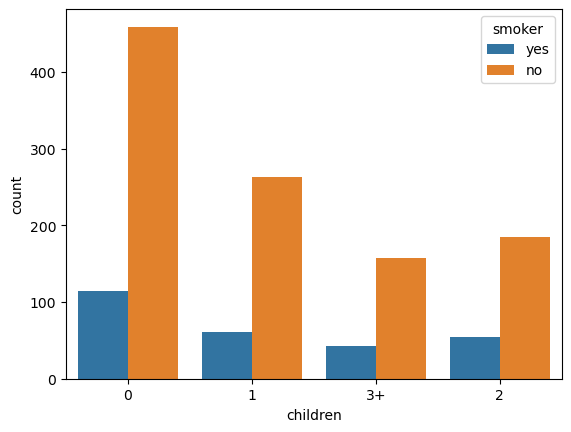

In [75]:
sns.countplot(x='children',hue='smoker',data=df)

In [76]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

It looks like having children dont affect your BMI. 
However with increase in no of children medical expense increases. 
but if you see above distribution we can safely say having 0 or 1 child expnse is more or less equal, 
similarly having 2 or more child expense will be similar. 
So lets disribute into two part. 'less' if no of children is less than equal to 1 and 'more; if it 

In [77]:
df['child_cat']=np.NAN
df.loc[(df['children']=='0')|(df['children']=='1'), 'child_cat'] = 'less'
df.loc[(df['children']=='2')|(df['children']=='3+'), 'child_cat'] = 'more'

In [79]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

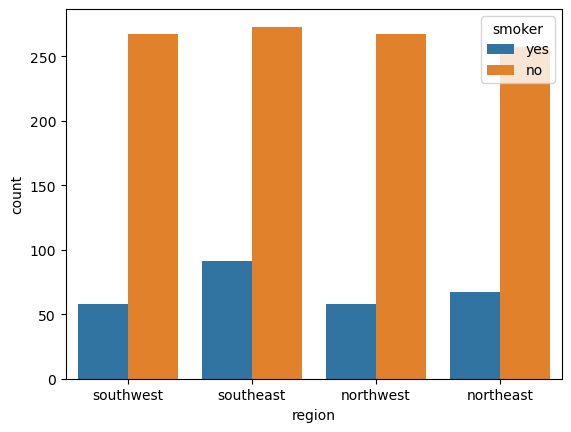

In [83]:
sns.countplot(x='region',hue='smoker',data=df)

Southeast has the maximum no of smoker followed by northeast , 
Thus the charges will also be high for southeast followed by northeast.

In [43]:
corr=df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

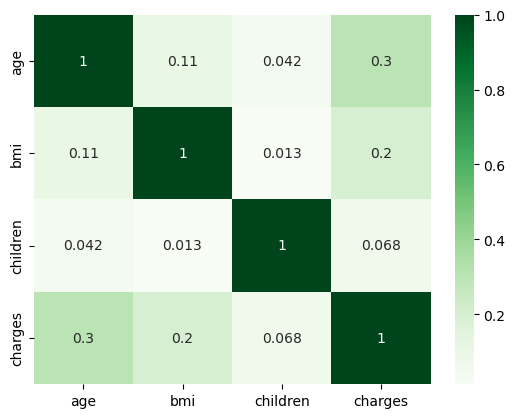

In [44]:
sns.heatmap(corr,cmap='Greens',annot=True)

Observation

Correlation exists between -1 to +1

Darker shades are highly coorelated and lighter shades have least correlation.

Also the age column is positively correlated with charge column.


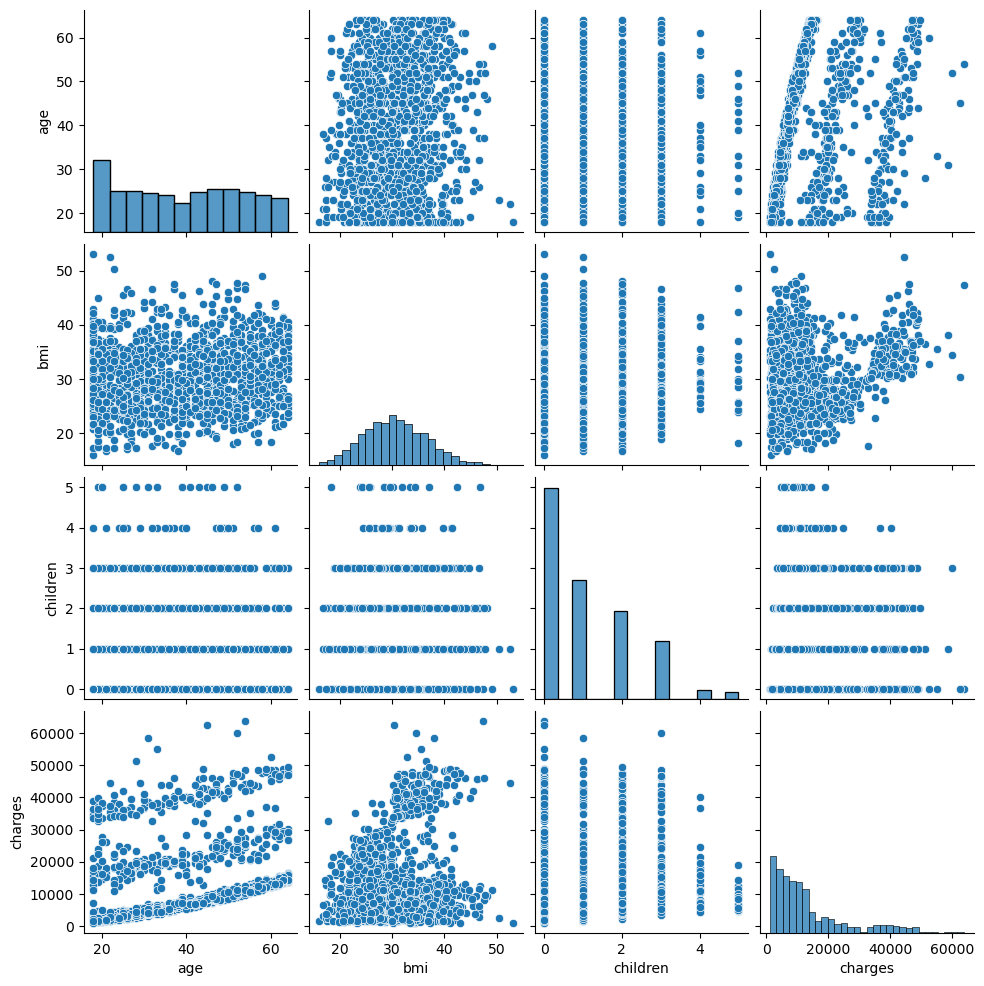

In [45]:
sns.pairplot(df)

### Encoding categorical columns

In [86]:
df1=df.copy()

In [87]:
#   FEATURE ENGINEERING
df1.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat,child_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young,overweight,less
1,18,male,33.770,1,no,southeast,1725.55230,Young,obese,less
2,28,male,33.000,3+,no,southeast,4449.46200,Adult,obese,more
3,33,male,22.705,0,no,northwest,21984.47061,Adult,healthy,less
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight,less


In [88]:
df1=df1.drop(['age','bmi','children'],axis=1)

In [89]:
df1['age_cat'].unique()

array(['Young', 'Adult', 'Senior Adult', 'Elder'], dtype=object)

In [90]:
df1['bmi_cat'].unique()

array(['overweight', 'obese', 'healthy', 'ext_obese', 'underweight'],
      dtype=object)

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1338 non-null   object 
 1   smoker     1338 non-null   object 
 2   region     1338 non-null   object 
 3   charges    1338 non-null   float64
 4   age_cat    1338 non-null   object 
 5   bmi_cat    1338 non-null   object 
 6   child_cat  1338 non-null   object 
dtypes: float64(1), object(6)
memory usage: 73.3+ KB


In [92]:
df1['age_cat']=df1['age_cat'].map({'Young':0, 'Adult':1, 'Senior Adult':2, 'Elder':3})
df1['bmi_cat']=df1['bmi_cat'].map({'underweight':0, 'healthy':1, 'overweight':2, 'obese':3,'ext_obese':4})
df1['child_cat']=df1['child_cat'].map({'less':0, 'more':1})

In [93]:
df1.head()

,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,yes,southwest,16884.92400,0,2,0
1,male,no,southeast,1725.55230,0,3,0
2,male,no,southeast,4449.46200,1,3,1
3,male,no,northwest,21984.47061,1,1,0
4,male,no,northwest,3866.85520,1,2,0


In [94]:
df1['smoker']=df1['smoker'].map({'no':0, 'yes':1})

In [95]:
df1.head()

,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,1,southwest,16884.92400,0,2,0
1,male,0,southeast,1725.55230,0,3,0
2,male,0,southeast,4449.46200,1,3,1
3,male,0,northwest,21984.47061,1,1,0
4,male,0,northwest,3866.85520,1,2,0


In [97]:
df_hot = pd.get_dummies(df1['region'])
df_hot1 = pd.get_dummies(df1['sex'])
df1

,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,1,southwest,16884.92400,0,2,0
1,male,0,southeast,1725.55230,0,3,0
2,male,0,southeast,4449.46200,1,3,1
3,male,0,northwest,21984.47061,1,1,0
4,male,0,northwest,3866.85520,1,2,0
...,...,...,...,...,...,...,...
1333,male,0,northwest,10600.54830,2,3,1
1334,female,0,northeast,2205.98080,0,3,0
1335,female,0,southeast,1629.83350,0,3,0
1336,female,0,southwest,2007.94500,0,2,0


In [98]:
df1=df1.drop(['region','sex'],axis=1)

In [99]:
df_final=pd.concat([df1,df_hot,df_hot1],axis=1)

In [100]:
df_final.head()

,smoker,charges,age_cat,bmi_cat,child_cat,northeast,northwest,southeast,southwest,female,male
0,1,16884.92400,0,2,0,0,0,0,1,1,0
1,0,1725.55230,0,3,0,0,0,1,0,0,1
2,0,4449.46200,1,3,1,0,0,1,0,0,1
3,0,21984.47061,1,1,0,0,1,0,0,0,1
4,0,3866.85520,1,2,0,0,1,0,0,0,1


We have converted the string values into categorical values

### Plotting Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2490231f6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2490231fc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2490231f3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2490232e220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2490232e4f0>],
 'means': []}

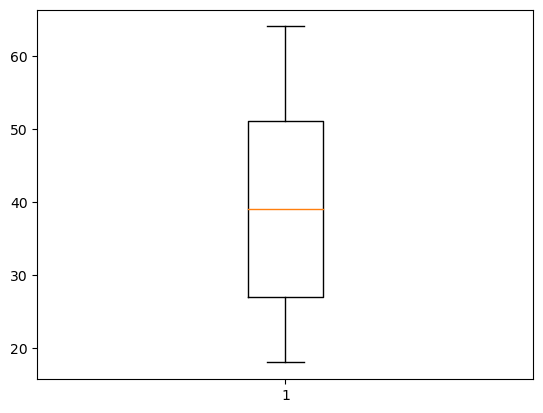

In [86]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x249024a6e20>,
 'caps': [<matplotlib.lines.Line2D at 0x249024b7400>,
 'boxes': [<matplotlib.lines.Line2D at 0x249024979d0>],
 'medians': [<matplotlib.lines.Line2D at 0x249024b79a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249024b7c70>],
 'means': []}

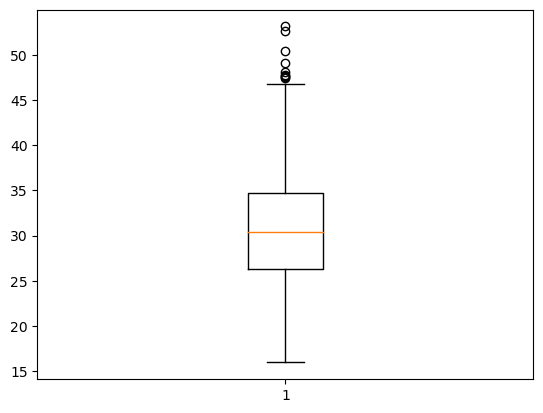

In [87]:
plt.boxplot(df['bmi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x249023a0b50>,
 'caps': [<matplotlib.lines.Line2D at 0x249023b3130>,
 'boxes': [<matplotlib.lines.Line2D at 0x249023a0880>],
 'medians': [<matplotlib.lines.Line2D at 0x249023b36d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249023b39a0>],
 'means': []}

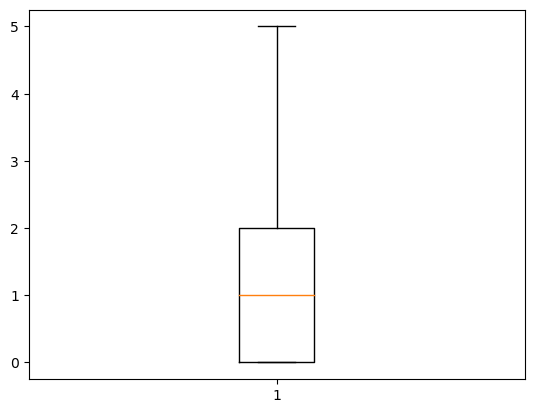

In [88]:
plt.boxplot(df['children'])

### Data Cleaning

#### Removing Outliers

In [89]:
#removing outliers by Z-score method
z=np.abs(zscore(df['bmi']))
z

0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64

In [90]:
df.shape

(1338, 7)

In [91]:
threshold=3
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64),)


In [92]:
df_new=df[(z<3)]

In [93]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [94]:
df_new.shape

(1334, 7)

so after removing zscore 4 rows are deleted as an outliers from 1338 rows

<AxesSubplot:xlabel='age', ylabel='Density'>

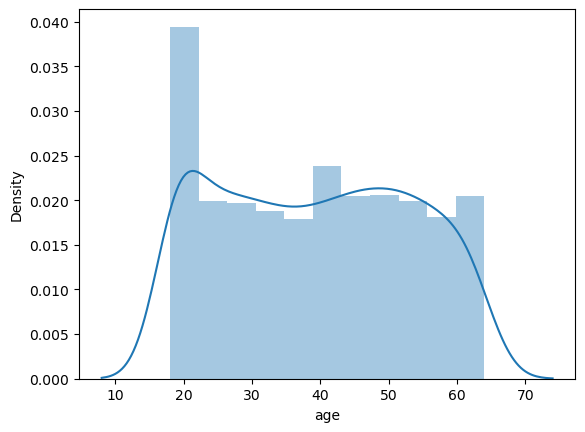

In [113]:
sns.distplot(df_new['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

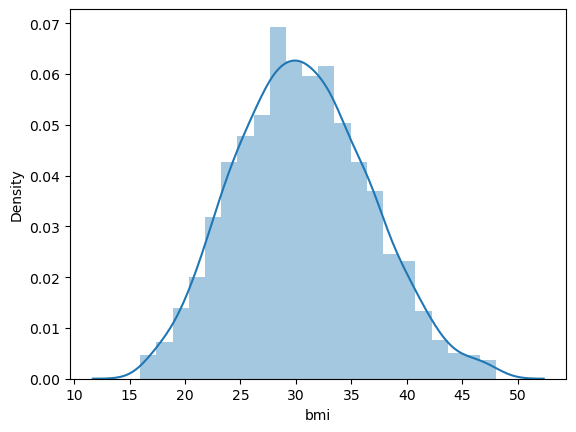

In [114]:
sns.distplot(df_new['bmi'])

<AxesSubplot:xlabel='children', ylabel='Density'>

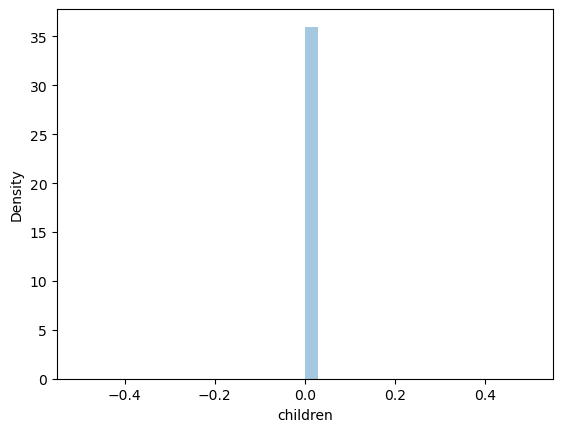

In [115]:
sns.distplot(df_new['children'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

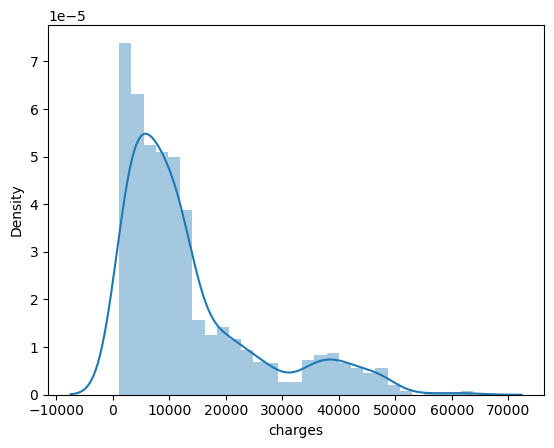

In [116]:
sns.distplot(df_new['charges'])

In [99]:
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

we observe that the continuous datas are positively correlated with target variable

### Visualizing the correlation between label and features using bar plot

Text(0, 0.5, 'Target')

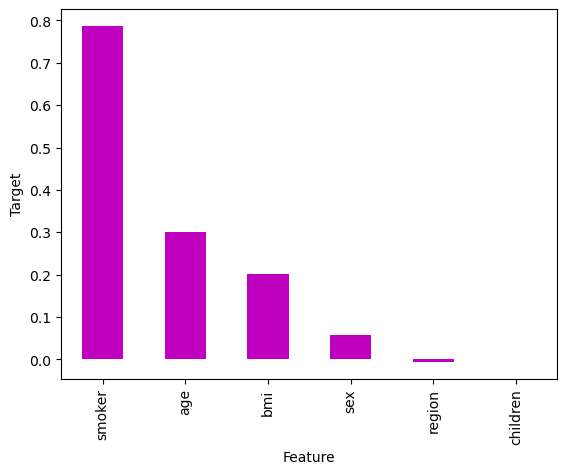

In [117]:
df_new.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Feature')
plt.ylabel('Target')

### Checking for skewness


 mu = 13270.42 and sigma = 12105.48



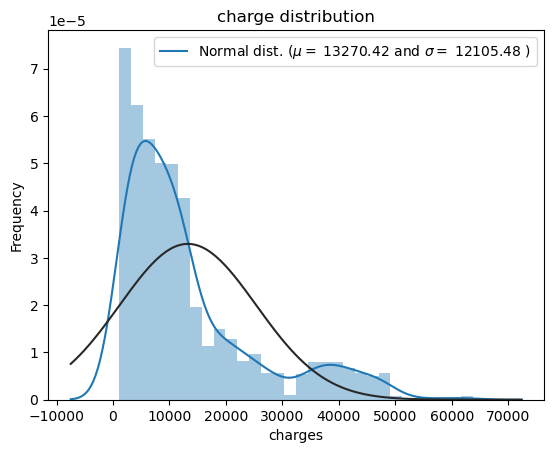

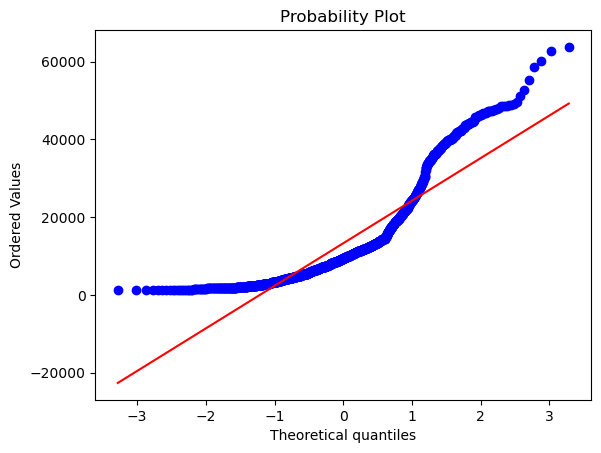

In [101]:
#bydefault the acceptable skewness is -0.5 to +0.5
#Skewness of dependent variable
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df['charges'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_final['charges'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('charge distribution')

fig = plt.figure()
res = stats.probplot(df['charges'], plot=plt)
plt.show()

In [102]:
df_final.head()

,smoker,charges,age_cat,bmi_cat,child_cat,northeast,northwest,southeast,southwest,female,male
0,1,16884.92400,0,2,0,0,0,0,1,1,0
1,0,1725.55230,0,3,0,0,0,1,0,0,1
2,0,4449.46200,1,3,1,0,0,1,0,0,1
3,0,21984.47061,1,1,0,0,1,0,0,0,1
4,0,3866.85520,1,2,0,0,1,0,0,0,1


## Modelling

### Finding the best random state

In [104]:
Df_out=df_final['charges']
input_df=df_final.drop(['charges'],axis=1)


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(input_df)


In [109]:
r2_Scores = []
models1 = ['Linear Regression' , 'GradientBoosting Regression' ,'DecisionTreeRegressor','SVR','RandomForestRegression']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(input_df,Df_out,test_size=0.10)

In [112]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
#print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 1204
Number of data points in test data: 134


In [113]:
df_final.shape

(1338, 11)

In [114]:
#Standarization
# X_train.describe()
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
#y_cv= y_cv.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
#X_cv = sc_X.fit_transform(X_cv)
#y_cv = sc_y.fit_transform(y_cv)

In [115]:
#Linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)
# print the intercept
print(lm.intercept_)

LinearRegression()
[-0.0021008]


In [116]:
print(lm.coef_)

[[ 7.88850968e-01  2.97909573e-01  1.58658613e-01  6.85249286e-02
  -1.17498710e+13 -1.21395919e+13 -1.24253085e+13 -1.19367772e+13
  -3.15428862e+11 -3.15428862e+11]]


In [117]:
lm_pred = lm.predict(X_test)
lm_pred= lm_pred.reshape(-1,1)
print("accuracy: "+ str(lm.score(X_test,y_test)*100) + "%")

accuracy: -1.0244086188683865e+27%


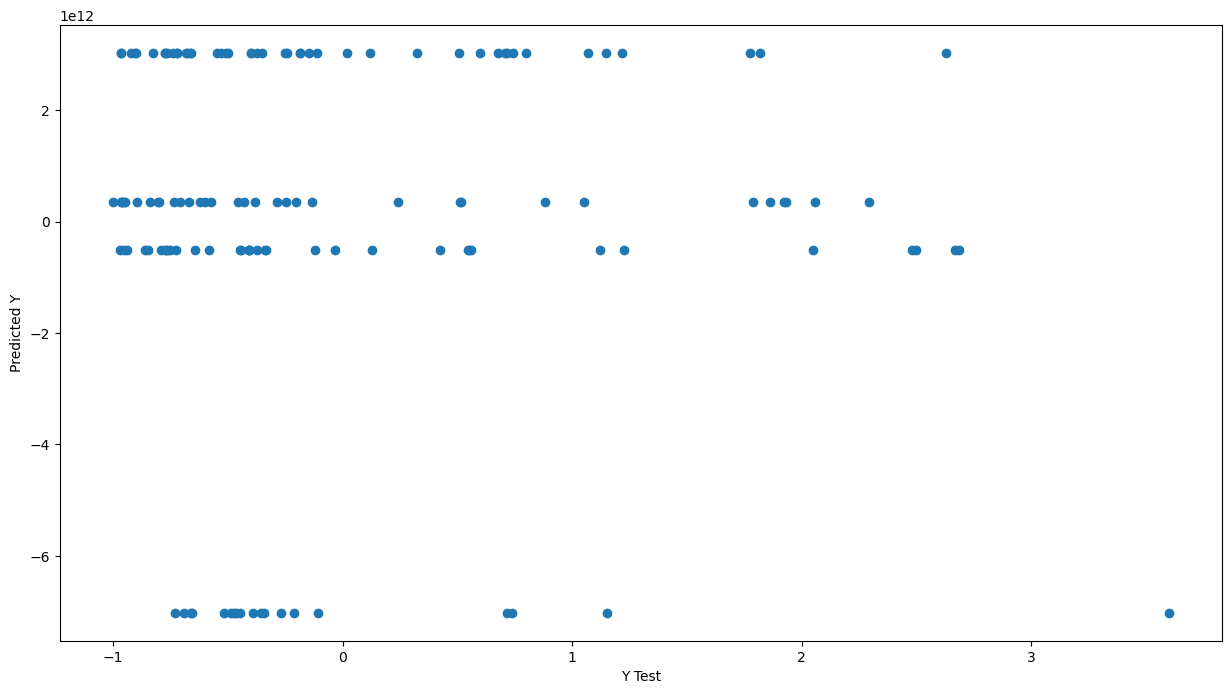

In [118]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lm_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [119]:
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
r2=r2_score(y_test, lm_pred)
print('MAE:', metrics.mean_absolute_error(y_test, lm_pred))
print('MSE:', metrics.mean_squared_error(y_test, lm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
print('r2 score:',r2)
R2_Scores.append(r2)

MAE: 2256607245862.05
MSE: 1.0244086188683865e+25
RMSE: 3200638403300.7954
r2 score: -1.0244086188683865e+25


NameError: name 'R2_Scores' is not defined

In [121]:
#   Gradient Boosting

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=4,
                          n_estimators=500)

In [122]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [141]:
r2=r2_score(y_test, clf_pred)
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
print('r2 score:',r2)
r2_Scores.append(r2)

MAE: 0.25692628451409966
MSE: 0.18105613229438125
RMSE: 0.42550691215817077
r2 score: 0.8189438677056188


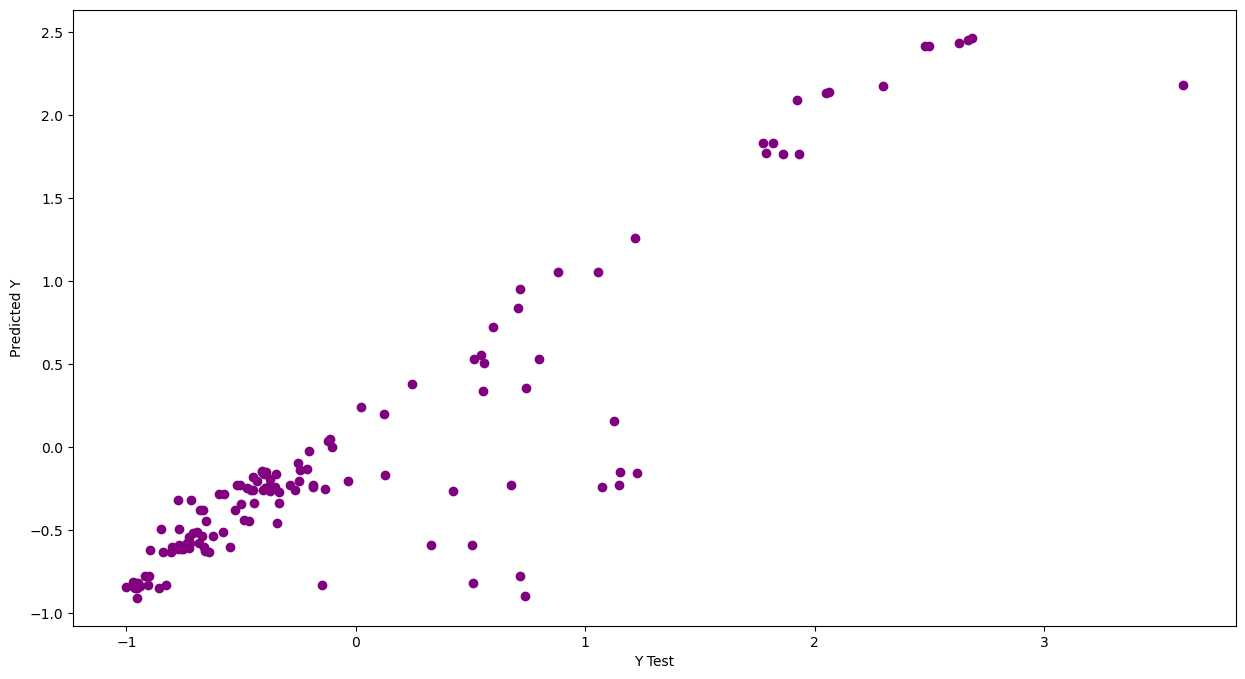

In [124]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [125]:
#    DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [126]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [142]:
r2=r2_score(y_test, dtr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('r2 score:',r2)

r2_Scores.append(r2)

MAE: 0.2835671091771462
MSE: 0.2108056981270453
RMSE: 0.45913581664584313
r2 score: 0.7891943018729547


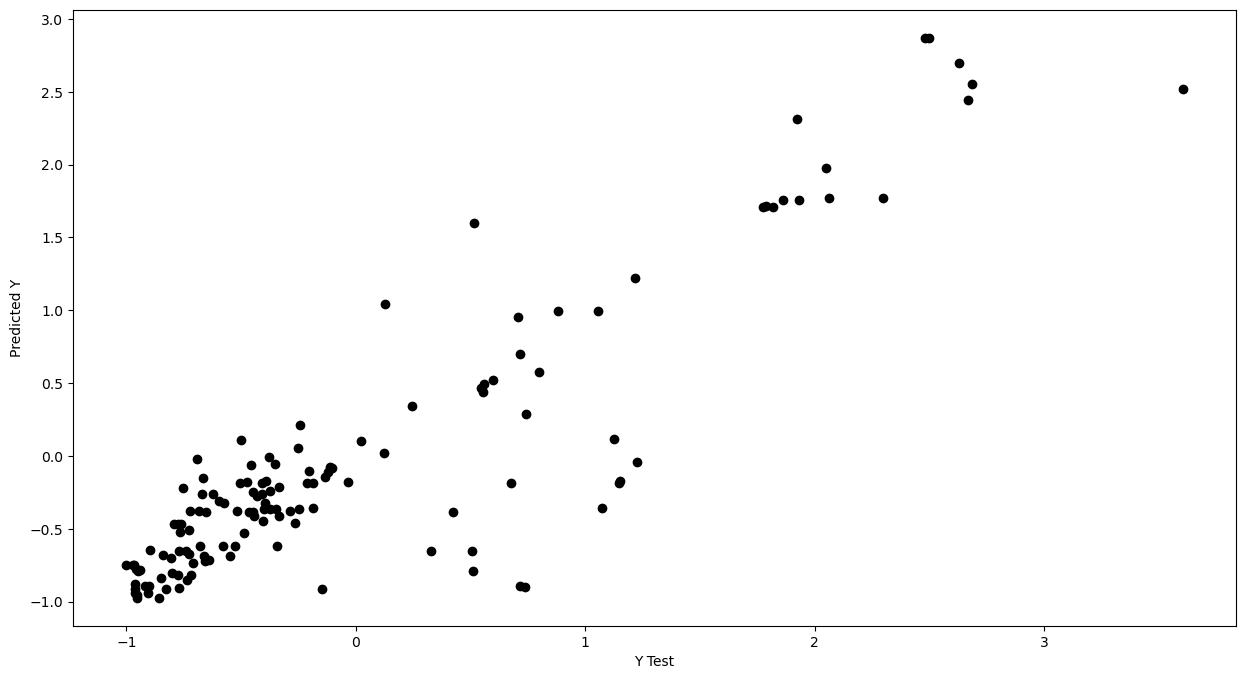

In [128]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='black')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [129]:
#   SVR
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [130]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [143]:
r2=r2_score(y_test, svr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('r2 score:',r2)

r2_Scores.append(r2)

MAE: 0.2747045748840743
MSE: 0.2167359710699054
RMSE: 0.46554910704447217
r2 score: 0.7832640289300946


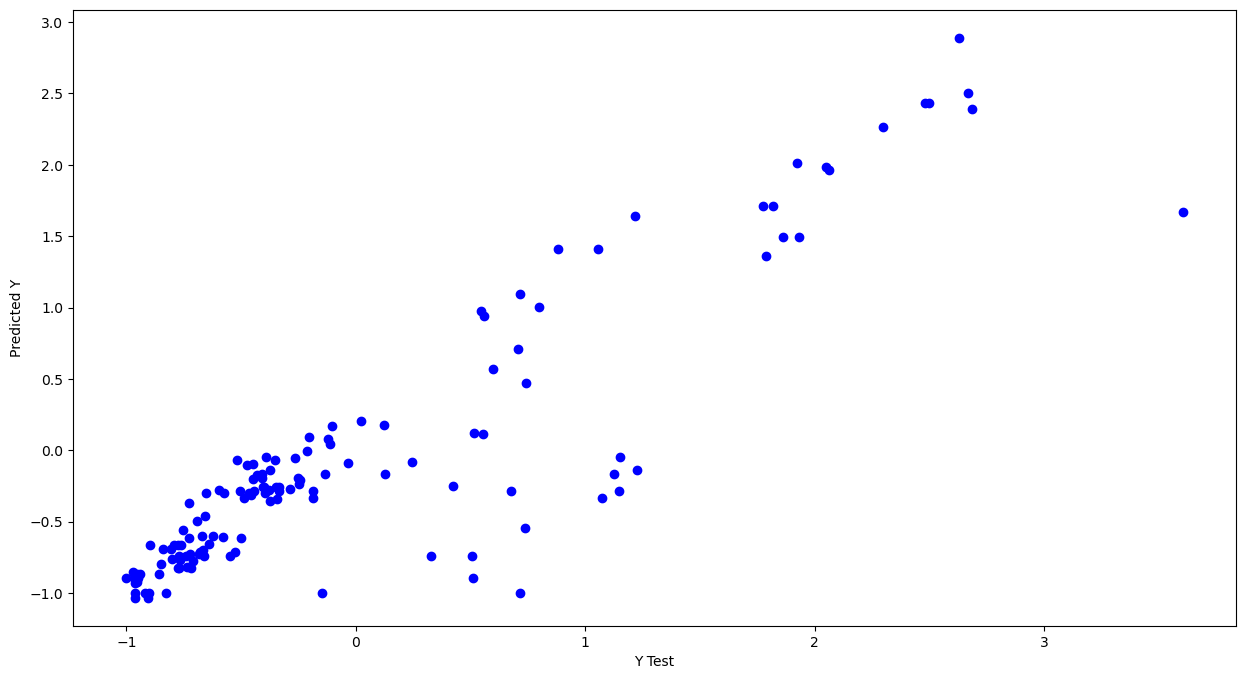

In [132]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [133]:
#   RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1500, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1500, random_state=0)

In [134]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [144]:
r2=r2_score(y_test, rfr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('r2 score:',r2)

r2_Scores.append(r2)

MAE: 0.2720631239566528
MSE: 0.19505532638063539
RMSE: 0.4416506836637247
r2 score: 0.8049446736193646


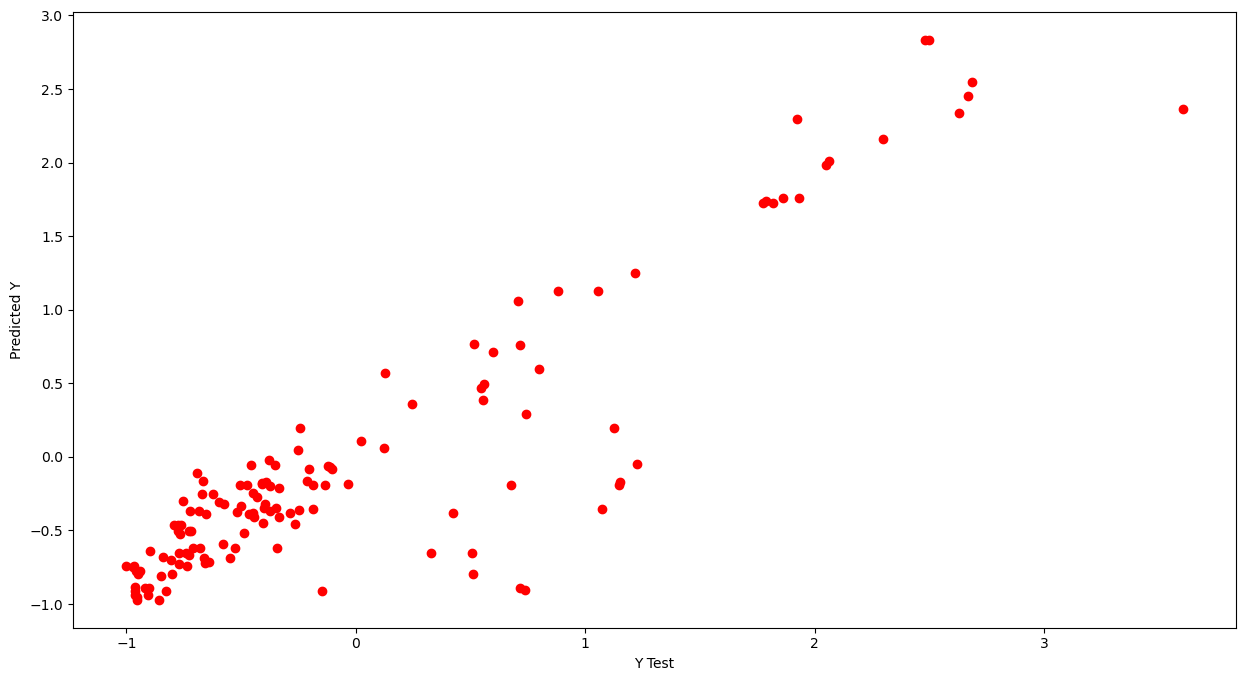

In [136]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


In [137]:
#   KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


###### KNeighbours Regression ######
Score : 0.7757
[0.74738406 0.72417509 0.81377966 0.8100714  0.80000471]

MSE    : 0.22 
MAE    : 0.33 
RMSE   : 0.47 
R2     : 0.78 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [145]:
from sklearn.model_selection import GridSearchCV
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
r2_Scores.append(r2)

Score : 0.7757
R2     : 0.78 


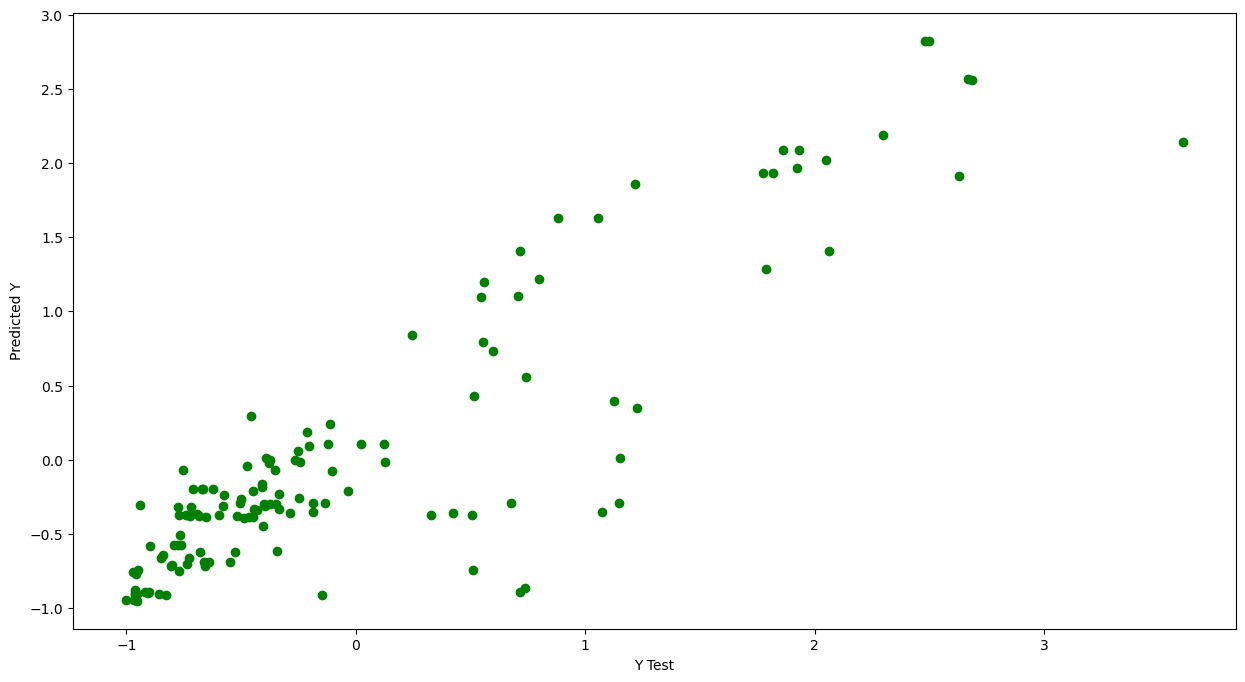

In [139]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred, c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [146]:
compare = pd.DataFrame({'Algorithms' : models1 , 'R2-Scores' : r2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)
compare


,Algorithms,R2-Scores
0,Linear Regression,0.818944
1,GradientBoosting Regression,0.789194
2,DecisionTreeRegressor,0.783264
3,SVR,0.804945
4,RandomForestRegression,0.775712
